# Chi-square

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [10]:
import numpy as np

In [11]:
from lint_analysis.bin_counts import cache

In [12]:
def plot_series(token, title=None):
    
    series = cache.token_series(token)
    
    plt.figure(figsize=(10, 5))

    plt.title(title or '"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    
    plt.hist(
        np.arange(len(series)),
        bins=len(series),
        weights=series,
        edgecolor='black',
        zorder=3,
    )
    
    plt.show()

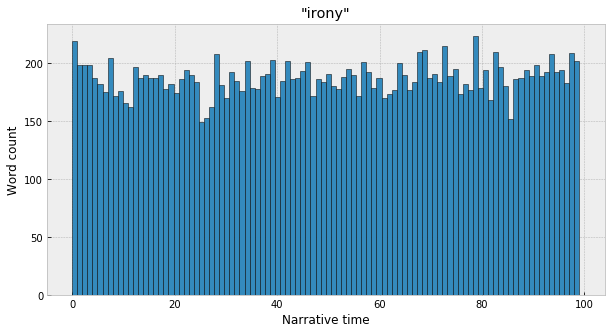

In [38]:
plot_series('irony')

In [14]:
from scipy import stats

def series_chisquare(series):
    expected = np.full(len(series), series.sum() / len(series))
    return stats.chisquare(series, expected)

In [15]:
tokens = cache.token_counts(10000)

In [16]:
data = []
for i, (token, count) in enumerate(tokens.items()):
    chi, p = series_chisquare(cache.token_series(token))
    data.append((count, chi, p))
    if i%1000 == 0: print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [17]:
import pandas as pd

df = pd.DataFrame(
    data,
    columns=('count', 'chi', 'p'),
    index=tokens.keys(),
)

In [18]:
pd.set_option('display.max_rows', 1000)

df.sort_values('chi', ascending=False).head(100)

,count,chi,p
chapter,452057,136700.921457,0.0
”,34933931,101300.818804,0.0
you,20487595,96863.255295,0.0
a,44510387,83315.424513,0.0
of,50833243,81168.949273,0.0
the,111130017,78820.650937,0.0
i,32574587,76599.976262,0.0
i.,95391,69649.772190,0.0
.,115472128,56904.238443,0.0
?,12766593,50347.668391,0.0


In [19]:
df.loc['death']

count    593893.000000
chi       16925.196039
p             0.000000
Name: death, dtype: float64

In [20]:
df.loc['athletic']

count     1.100700e+04
chi       1.467053e+03
p        3.147353e-242
Name: athletic, dtype: float64

In [21]:
len(df)

10908

In [22]:
len(df[df['p'] < 0.05])

10513

In [23]:
len(df[df['p'] < 0.05]) / len(df)

0.9637880454712138

In [24]:
len(df[df['p'] < 0.01])

10227

In [25]:
len(df[df['p'] < 0.01]) / len(df)

0.9375687568756875

In [26]:
len(df[df['p'] < 0.001])

9815

In [27]:
len(df[df['p'] < 0.001]) / len(df)

0.8997983131646498

In [28]:
len(df[df['p'] < 1e-10])

7830

In [29]:
len(df[df['p'] < 1e-10]) / len(df)

0.7178217821782178